# Files needed
* the pickle file containing the tifascores
* prompts file

# This notebook is intended to generate the visualization of the computed tifascores

# Imports

In [1]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

# Input paths

In [2]:
#input = '/kaggle/input/clipscorelistdalle2/clipScoreDictionary_DALL-E 2.pkl'
#input_prompt_file = '/kaggle/input/jpprompts/prompts.txt'
numberOfTifaVariants = 4

is1024 = False

if is1024:
    pklPathTifaScoreSDXL = [os.path.join('/kaggle/input/tifascoresdxl1024', i) for i in sorted(os.listdir('/kaggle/input/tifascoresdxl1024'))]
    pklPathTifaScoreSDXLTurbo = [os.path.join('/kaggle/input/tifascoresdxlturbo1024', i) for i in sorted(os.listdir('/kaggle/input/tifascoresdxlturbo1024'))]
    pklPathTifaScoreFluxSchnell = [os.path.join('/kaggle/input/tifascorefluxschnell1024', i) for i in sorted(os.listdir('/kaggle/input/tifascorefluxschnell1024'))]
    pklPathTifaScoreDALLE = [os.path.join('/kaggle/input/tifascoredalle1024', i) for i in sorted(os.listdir('/kaggle/input/tifascoredalle1024'))]

elif is1024 != True:
    pklPathTifaScoreSDXL = [os.path.join('/kaggle/input/tifascoresdxl512', i) for i in sorted(os.listdir('/kaggle/input/tifascoresdxl512'))]
    pklPathTifaScoreSDXLTurbo = [os.path.join('/kaggle/input/tifascoresdxlturbo512', i) for i in sorted(os.listdir('/kaggle/input/tifascoresdxlturbo512'))]
    pklPathTifaScoreFluxSchnell = [os.path.join('/kaggle/input/tifascorefluxschnell512', i) for i in sorted(os.listdir('/kaggle/input/tifascorefluxschnell512'))]
    pklPathTifaScoreDALLE = [os.path.join('/kaggle/input/tifascoredalle512', i) for i in sorted(os.listdir('/kaggle/input/tifascoredalle512'))]



input_prompt_file = '/kaggle/input/jpprompts/prompts.txt'


print('pklPathTifaScoreSDXL: \n', pklPathTifaScoreSDXL)
print('pklPathTifaScoreSDXLTurbo: \n', pklPathTifaScoreSDXLTurbo)
print('pklPathTifaScoreFluxSchnell: \n', pklPathTifaScoreFluxSchnell)
print('pklPathTifaScoreDALLE: \n', pklPathTifaScoreDALLE)


# since the paths have been sorted, the order of list of dictionaries will be: 
# blip, git, mplug and vilt

pklPathTifaScoreSDXL: 
 ['/kaggle/input/tifascoresdxl512/tifaScore_SDXL_512_blip-large.pkl', '/kaggle/input/tifascoresdxl512/tifaScore_SDXL_512_mplug-large.pkl', '/kaggle/input/tifascoresdxl512/tifaScore_SDXL_512_vilt.pkl', '/kaggle/input/tifascoresdxl512/tifaScore_SDXL_TURBO_512_git-large.pkl']
pklPathTifaScoreSDXLTurbo: 
 ['/kaggle/input/tifascoresdxlturbo512/tifaScore_SDXL_TURBO_512_git-large.pkl', '/kaggle/input/tifascoresdxlturbo512/tifaScore_SDXL_TURBO_512_mplug-large.pkl', '/kaggle/input/tifascoresdxlturbo512/tifaScore_SDXL_TURBO_512_vilt.pkl', '/kaggle/input/tifascoresdxlturbo512/tifaScore_SDXL_TURBO_blip-large.pkl']
pklPathTifaScoreFluxSchnell: 
 ['/kaggle/input/tifascorefluxschnell512/tifaScore_FLUX_SCHNELL_512_blip-large.pkl', '/kaggle/input/tifascorefluxschnell512/tifaScore_FLUX_SCHNELL_512_git-large.pkl', '/kaggle/input/tifascorefluxschnell512/tifaScore_FLUX_SCHNELL_512_mplug-large.pkl', '/kaggle/input/tifascorefluxschnell512/tifaScore_FLUX_SCHNELL_512_vilt.pkl']
pklPathTi

# utils

In [3]:
#convert pickle to dictionary 
def convertPickleToDictionary(filePath):
    dictOfDictionaries = {}
    for i in filePath:
        fp = os.path.join('/kaggle/input', i)
        with open(fp, 'rb') as f:
            dictOfDictionaries[i.split('/')[-1]] = pickle.load(f)
    return dictOfDictionaries

#extract keys and values from the input dictionary
def extractDictionaryKeyAndValues(inputDictionary):
    dictKeys = list(inputDictionary.keys())
    dictValues = list(inputDictionary.values())
    return dictKeys, dictValues

# Read the pickle file

In [4]:
dictOfDictTifaScoreSDXL = convertPickleToDictionary(pklPathTifaScoreSDXL)
dictOfDictTifaScoreSDXLTurbo = convertPickleToDictionary(pklPathTifaScoreSDXLTurbo)
dictOfDictTifaScoreDALLE = convertPickleToDictionary(pklPathTifaScoreDALLE)
dictOfDictTifaScoreFluxSchnell = convertPickleToDictionary(pklPathTifaScoreFluxSchnell)

listOfDictOfDictTifaScores = [dictOfDictTifaScoreDALLE,
                              dictOfDictTifaScoreSDXL,
                              dictOfDictTifaScoreFluxSchnell,
                              dictOfDictTifaScoreSDXLTurbo]

# each variable declared above is a list of 4 dictionaries (dictOfDictTifaScores.....) , 
# for instance dictTifaScoresSDXL contains 4 dictionaries (corresponding to blip, git, mplug and vilt)
# containing 198 tifa scores for sdxl t2i model

In [5]:
for dictOfDict in listOfDictOfDictTifaScores:
    for i, j in dictOfDict.items():
        print(i)
        print(j[197])
        print('xxxxxxx')

tifaScore_DALL-E_512_blip-large.pkl
{'tifa_score': 0.8, 'question_details': {'what body part is this?': {'caption': 'Closeup of a hand, white studio background', 'element': 'hand', 'question': 'what body part is this?', 'choices': ['hand', 'foot', 'arm', 'leg'], 'answer': 'hand', 'element_type': 'animal/human', 'free_form_vqa': 'hand', 'multiple_choice_vqa': 'hand', 'scores': 1}, 'is the background white?': {'caption': 'Closeup of a hand, white studio background', 'element': 'white', 'question': 'is the background white?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'color', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what color is the background?': {'caption': 'Closeup of a hand, white studio background', 'element': 'white', 'question': 'what color is the background?', 'choices': ['white', 'black', 'red', 'blue'], 'answer': 'white', 'element_type': 'color', 'free_form_vqa': 'white', 'multiple_choice_vqa': 'white', 'scores': 1}, 'is this a closeu

# Read the prompt file

In [6]:
with open(input_prompt_file) as file:
    # add only those entries in the list from the prompt file that do not have '#' identifier
    prompt_list = [line.rstrip() for line in file if '#' not in line]
prompt_dictionary = {int(val.split(' : ')[0]):val.split(' : ')[-1] for val in prompt_list}
prompts = [val.split(' : ')[-1] for val in prompt_list]
prompt_length = [len(val.split(' ')) for val in prompts]
print(prompt_length)


[7, 5, 4, 5, 4, 8, 11, 9, 8, 10, 10, 10, 5, 8, 4, 6, 9, 10, 12, 9, 16, 11, 4, 11, 13, 10, 7, 8, 4, 10, 11, 10, 10, 10, 10, 8, 8, 9, 7, 7, 3, 10, 7, 3, 7, 10, 4, 3, 10, 14, 9, 12, 10, 13, 12, 9, 11, 11, 8, 12, 12, 9, 11, 14, 18, 15, 9, 12, 12, 13, 14, 9, 10, 10, 9, 8, 20, 11, 13, 10, 12, 15, 13, 3, 13, 8, 10, 10, 9, 8, 7, 8, 8, 9, 5, 9, 5, 11, 11, 13, 6, 11, 12, 10, 12, 8, 8, 7, 6, 11, 9, 6, 10, 9, 6, 11, 12, 9, 8, 10, 8, 10, 16, 9, 11, 9, 11, 11, 9, 13, 11, 9, 6, 5, 16, 10, 10, 10, 12, 6, 10, 6, 6, 5, 7, 8, 9, 10, 7, 10, 8, 9, 9, 8, 10, 7, 9, 9, 3, 12, 10, 7, 6, 10, 7, 9, 12, 9, 10, 12, 12, 8, 7, 7, 7, 8, 9, 5, 10, 6, 9, 9, 13, 8, 5, 8, 11, 5, 9, 8, 7, 8, 12, 10, 6, 11, 8, 7, 7, 7]


In [7]:
print(prompt_dictionary)

{1: 'conductor conducting an orchestra, shot from behind', 2: 'a soldier saluting, news photograph', 3: 'road bicycle, studio lighting', 4: 'an A4 clipboard, stock photograph', 5: 'several examples of origami', 6: 'closeup of an armrest on a comfy armchair', 7: 'a straight, metal pipe with bolted joins runs through the desert', 8: 'closeup of a fine leather wallet on a benchtop', 9: "an astronaut spacesuit in a museum, tourist's photograph", 10: 'a jacket laid out on a white background, studio lighting', 11: 'closeup of a hat brim, centred on the brim edge', 12: 'solitary tuft of grass grows in a rocky landscape, closeup', 13: 'wooden diamond-shaped lattice, outdoor light', 14: 'Musician playing a saxophone, high detail, studio lighting', 15: 'Closeup of potato chips', 16: 'A beautifully gift-wrapped present, studio light', 17: 'Surgeons in blue scrubs perform a surgery, stock photograph', 18: 'A woman greets guests at the front door, stock photograph', 19: 'A restaurant employee takes

# Color scheme

In [8]:
# Default color cycle (Tableau 10 colors)
colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # yellow-green
    '#17becf'   # teal
]

# Extract the keys and the values from the tifaScoreDictionary

In [9]:
dictKeysTifaScoreDALLE, dictValuesTifaScoreDALLE = extractDictionaryKeyAndValues(listOfDictOfDictTifaScores[0])
dictKeysTifaScoreSDXL, dictValuesTifaScoreSDXL = extractDictionaryKeyAndValues(listOfDictOfDictTifaScores[1])
dictKeysTifaScoreFluxSchnell, dictValuesTifaScoreFluxSchnell = extractDictionaryKeyAndValues(listOfDictOfDictTifaScores[2])
dictKeysTifaScoreSDXLTurbo, dictValuesTifaScoreSDXLTurbo = extractDictionaryKeyAndValues(listOfDictOfDictTifaScores[3])

In [10]:
print(len(dictKeysTifaScoreSDXLTurbo))
print(dictKeysTifaScoreSDXLTurbo)
print(len(dictValuesTifaScoreSDXLTurbo))
#print(dictValuesTifaScoreSDXLTurbo)
#print(dictValuesTifaScoreSDXLTurbo[0][0]['tifa_score'])
print(dictValuesTifaScoreSDXLTurbo[0][0])

4
['tifaScore_SDXL_TURBO_512_git-large.pkl', 'tifaScore_SDXL_TURBO_512_mplug-large.pkl', 'tifaScore_SDXL_TURBO_512_vilt.pkl', 'tifaScore_SDXL_TURBO_blip-large.pkl']
4
{'tifa_score': 0.8333333333333334, 'question_details': {'who is conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conductor', 'question': 'who is conducting an orchestra?', 'choices': ['conductor', 'musician', 'singer', 'dancer'], 'answer': 'conductor', 'element_type': 'animal/human', 'free_form_vqa': 'conductor', 'multiple_choice_vqa': 'conductor', 'scores': 1}, 'is this an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'is this an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what type of group is this?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra',

# Line graph (same tifa metric across T2I models)

In [11]:
def linePlot(t2IModelList, clipMetricList, dictOfDictTifaScore, modelIndex):
    for metricIndex in range(numberOfTifaVariants):
        tifaScores = [i['tifa_score'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        #captionsWithNonZeroTifaScores = [i['caption'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        data = list(dictOfDictTifaScore[modelIndex].values())[metricIndex]
        tempCaptions = [details['caption'] for entry in data for details in entry['question_details'].values()]
        captions = list(set(tempCaptions))
        #print(captions)

        missingCaptionsIndices = [key for key, value in prompt_dictionary.items() if value not in captions]
        missingCaptions = [value for key, value in prompt_dictionary.items() if value not in captions]
        print(missingCaptions)
        print(missingCaptionsIndices)
        # update those indices with np.nan where the llama wasn't able to generate the questions
        [tifaScores.insert(i, np.nan) for i in missingCaptionsIndices]
        #print(tifaScores)
        
        plt.plot(range(len(tifaScores)),
                 tifaScores,
                 label=t2IModelList[metricIndex],
                 alpha=0.5
                 )
        #plt.scatter(color="red", marker="x", label="NaN marker")

        plt.grid(alpha=0.5)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
        #plt.title('CLIPScore vs prompt #')
        plt.ylabel('TIFA-'+tifaMetricList[modelIndex])
        plt.xlabel('prompt #')
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = tifaMetricList[modelIndex]
    if is1024:
        plt.savefig(fileName+'_line_plot_1024.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_line_plot_1024.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    elif is1024 != True:
        plt.savefig(fileName+'_line_plot_512.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_line_plot_512.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()

['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]


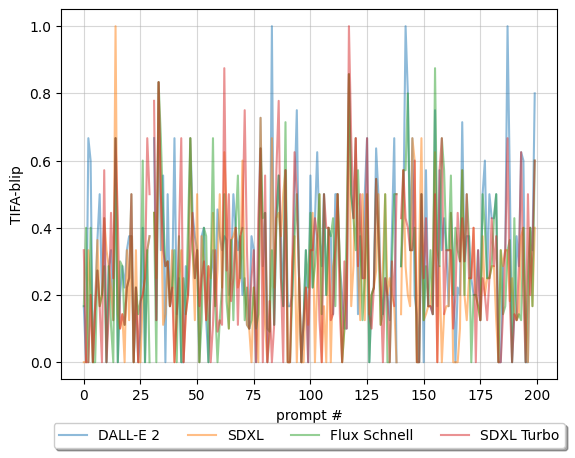

['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]


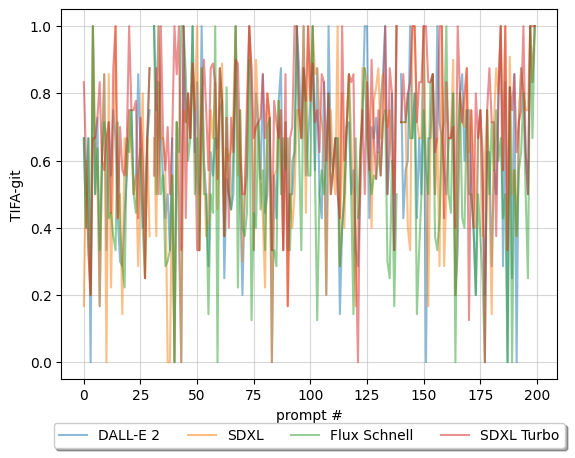

['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]


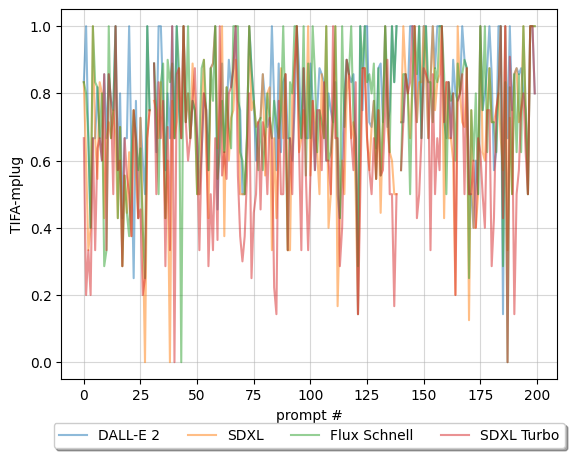

['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]


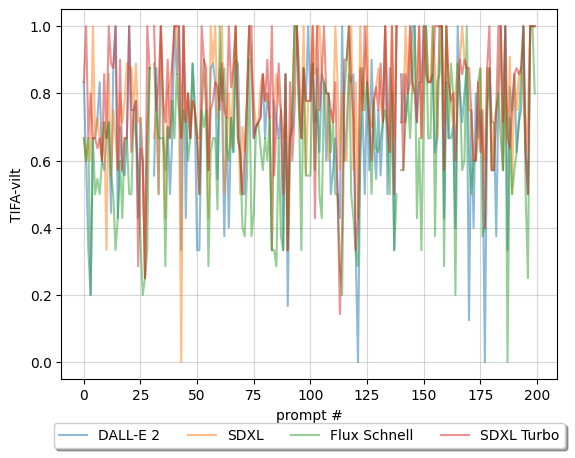

In [12]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
tifaMetricList = ['blip', 'git', 'mplug', 'vilt']

for modelIndex in range(len(t2IModelList)):
    linePlot(t2IModelList,
             tifaMetricList,
             [dictOfDictTifaScoreDALLE, dictOfDictTifaScoreSDXL, dictOfDictTifaScoreFluxSchnell, dictOfDictTifaScoreSDXLTurbo],
             modelIndex)

# Scatter plot (same tifa metric across T2I models)

In [13]:
def scatterPlot(t2IModelList, clipMetricList, dictOfDictTifaScore, modelIndex):
    for metricIndex in range(numberOfTifaVariants):
        tifaScores = [i['tifa_score'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        #captionsWithNonZeroTifaScores = [i['caption'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        data = list(dictOfDictTifaScore[modelIndex].values())[metricIndex]
        tempCaptions = [details['caption'] for entry in data for details in entry['question_details'].values()]
        captions = list(set(tempCaptions))
        #print(captions)

        missingCaptionsIndices = [key for key, value in prompt_dictionary.items() if value not in captions]
        missingCaptions = [value for key, value in prompt_dictionary.items() if value not in captions]
        print(missingCaptions)
        print(missingCaptionsIndices)
        # update those indices with np.nan where the llama wasn't able to generate the questions
        [tifaScores.insert(i, np.nan) for i in missingCaptionsIndices]
        #print(tifaScores)
        
        plt.scatter(range(len(tifaScores)),
                    tifaScores,
                    s=5,
                    label=t2IModelList[metricIndex],
                    alpha=0.5
                 )
        #plt.scatter(color="red", marker="x", label="NaN marker")

        plt.grid(alpha=0.5)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
        #plt.title('CLIPScore vs prompt #')
        plt.ylabel('TIFA-'+tifaMetricList[modelIndex])
        plt.xlabel('prompt #')
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = tifaMetricList[modelIndex]
    if is1024:
        plt.savefig(fileName+'_scatter_plot_1024.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_scatter_plot_1024.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    if is1024 != True:
        plt.savefig(fileName+'_scatter_plot_512.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_scatter_plot_512.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()

['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]


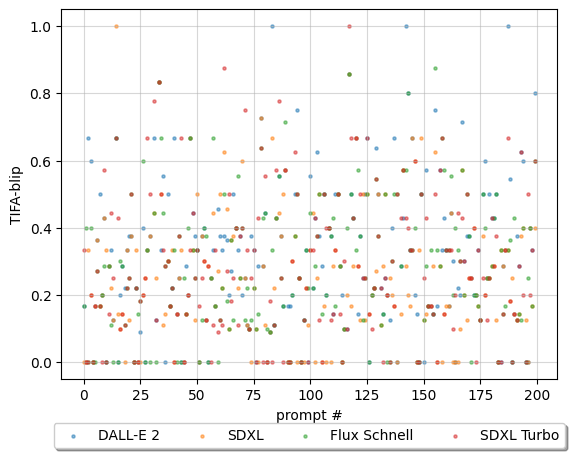

['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]


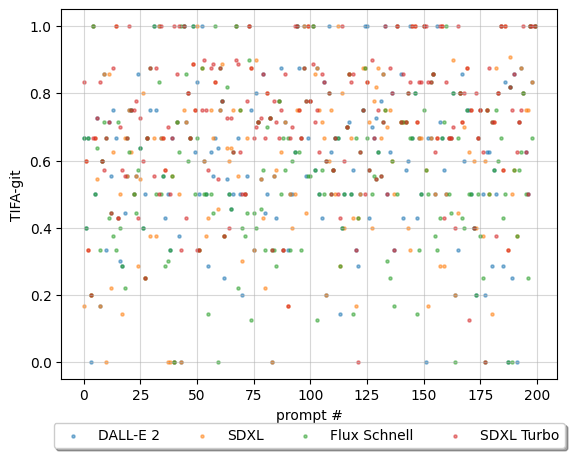

['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]


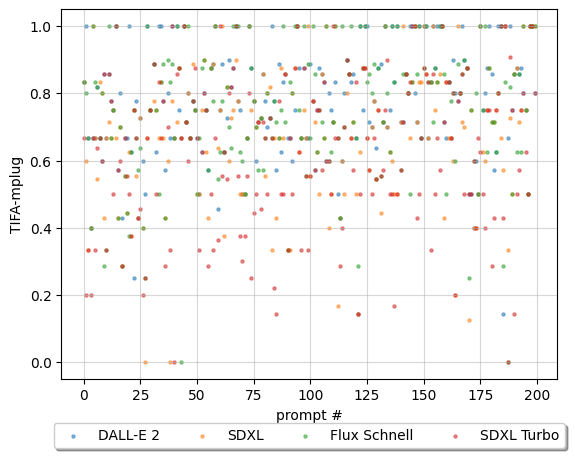

['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]
['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
[30, 139]


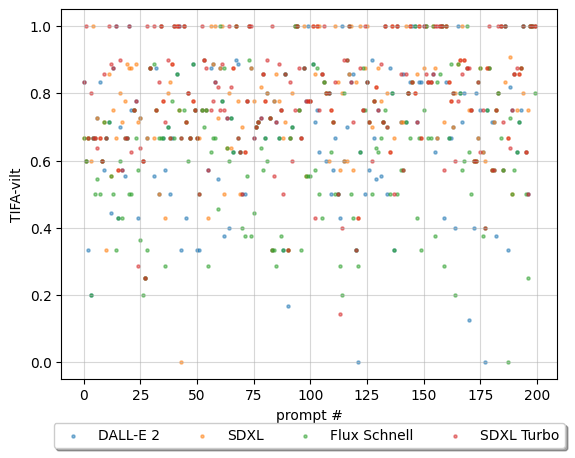

In [14]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
tifaMetricList = ['blip', 'git', 'mplug', 'vilt']

for modelIndex in range(len(t2IModelList)):
    scatterPlot(t2IModelList,
             tifaMetricList,
             [dictOfDictTifaScoreDALLE, dictOfDictTifaScoreSDXL, dictOfDictTifaScoreFluxSchnell, dictOfDictTifaScoreSDXLTurbo],
             modelIndex)

# Histogram

In [15]:
def histogramPlot(t2IModelList, tifaMetricList, dictOfDictionaries, modelIndex):
    # Define the custom bin width
    bin_width = 0.05

    #print(list(listOfDictionaries.values()))

    subDictionary = list(dictOfDictionaries.values())

    tifaScoreList = []

    for i in range(len(subDictionary)):
        tifaScoreSubList = [it['tifa_score'] for it in subDictionary[i]]
        #print(tifaScoreSubList)
        tifaScoreList.append(tifaScoreSubList)
    
    #print(len(tifaScoreList))
    #print(tifaScoreList)
    
    # Generate bin edges based on the minimum and maximum of all data
    min_edge = min(min(data) for data in tifaScoreList)
    max_edge = max(max(data) for data in tifaScoreList)
    bin_edges = np.arange(min_edge, max_edge + bin_width, bin_width)

    #print(min_edge, max_edge, bin_edges)
    
    
    for metricIndex in range(numberOfTifaVariants):
        #print(list(listOfDictionaries[metricIndex].keys())[modelIndex])
        #print(t2IModelList[metricIndex])
        #print(list(listOfDictionaries[modelIndex].values())[metricIndex])
        
        counts, bins, patches = plt.hist(tifaScoreList[metricIndex], 
                                         bins=bin_edges, 
                                         edgecolor='black',
                                         color=colors[metricIndex],
                                         alpha=0.5,
                                         label=t2IModelList[metricIndex])
        #Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE TIFA SCORE INTERVALS
        # Connect the tops of the bins
        bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the center of each bin
        plt.plot(bin_centers,
                 counts,
                 alpha=0.75,
                 color=colors[metricIndex],
                 linestyle='--',
                 marker='x',
                 label=t2IModelList[metricIndex])
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = tifaMetricList[modelIndex]
    plt.grid(alpha=0.5)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
    #plt.title('Distribution of '+ list(dictOfDictionaries.keys())[metricIndex].split('/')[-1])
    plt.title('Distribution of tifa-'+tifaMetricList[modelIndex])
    plt.ylabel('Count')
    plt.xlabel('TIFA Score')
    if is1024:
        plt.savefig(fileName+'_histogram_plot_1024.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_histogram_plot_1024.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    elif is1024 != True:
        plt.savefig(fileName+'_histogram_plot_512.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_histogram_plot_512.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    

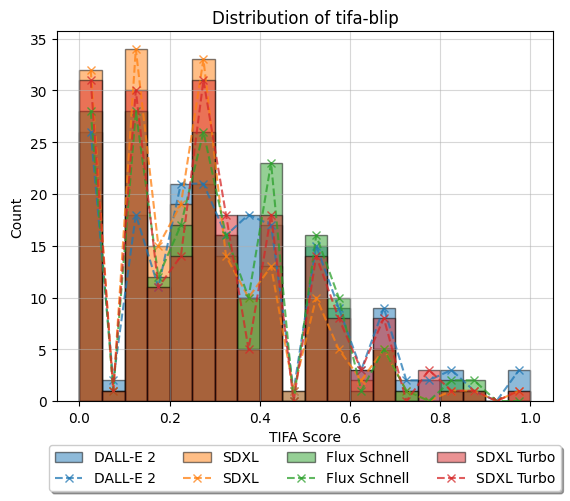

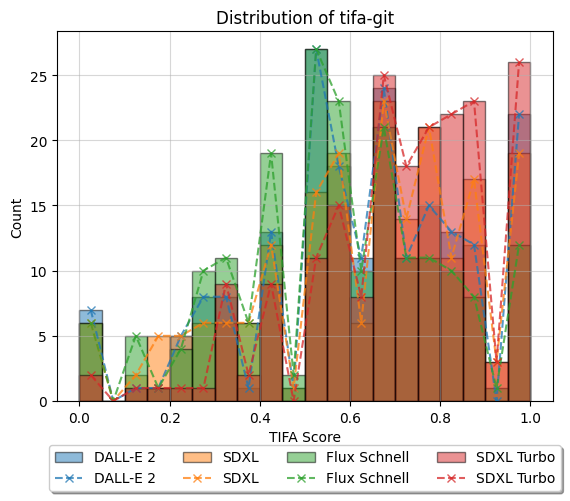

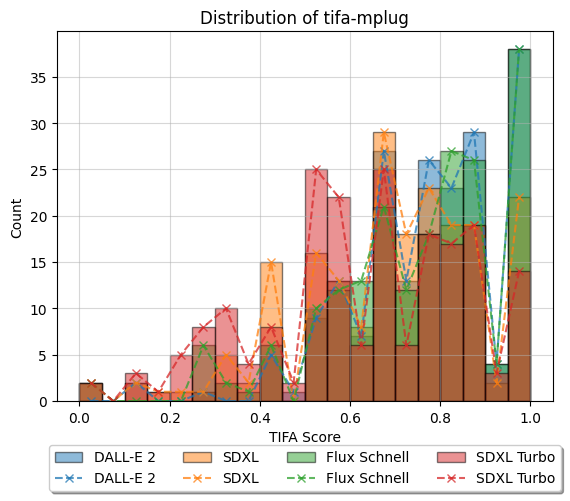

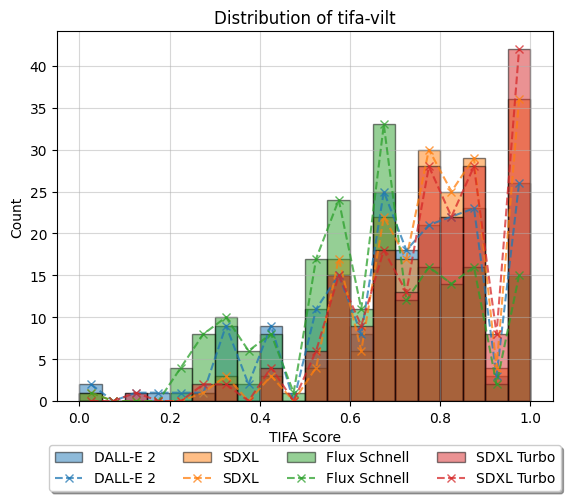

In [16]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
tifaMetricList = ['blip', 'git', 'mplug', 'vilt']

for modelIndex in range(len(t2IModelList)):
    histogramPlot(t2IModelList,
                  tifaMetricList,
                  listOfDictOfDictTifaScores[modelIndex],
                  modelIndex)

In [17]:
'''
for i in range(len(tifaScoreListOfLists)):
    print(colors[i])
    plt.plot(range(len(tifaScoreList)),
             tifaScoreListOfLists[i],
             color=colors[i],
             alpha=0.5,
             #marker='x',
             #ms=3,
             label=tifaModels[i]
            )
    
plt.grid(alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.title('TIFAScore vs prompt #')
plt.ylabel('TIFAScore')
plt.xlabel('prompt #')
plt.savefig(modelName+'_line_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.savefig(modelName+'_line_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
'''

"\nfor i in range(len(tifaScoreListOfLists)):\n    print(colors[i])\n    plt.plot(range(len(tifaScoreList)),\n             tifaScoreListOfLists[i],\n             color=colors[i],\n             alpha=0.5,\n             #marker='x',\n             #ms=3,\n             label=tifaModels[i]\n            )\n    \nplt.grid(alpha=0.5)\nplt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)\nplt.title('TIFAScore vs prompt #')\nplt.ylabel('TIFAScore')\nplt.xlabel('prompt #')\nplt.savefig(modelName+'_line_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)\nplt.savefig(modelName+'_line_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)\n"

In [18]:
'''
for i in range(len(tifaScoreListOfLists)):
    print(colors[i])
    plt.scatter(prompt_length[:len(tifaScoreList)], 
                tifaScoreListOfLists[i],
                color=colors[i],
                alpha=0.5,
                s=10,
                label=tifaModels[i])
plt.grid(alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.title('TIFAScore vs Prompt length')
plt.ylabel('TIFAScore')
#plt.xticks(range(0, max(prompt_length), 10))
plt.xlabel('prompts length')
plt.savefig(modelName+'_scatter_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.savefig(modelName+'_scatter_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
'''

"\nfor i in range(len(tifaScoreListOfLists)):\n    print(colors[i])\n    plt.scatter(prompt_length[:len(tifaScoreList)], \n                tifaScoreListOfLists[i],\n                color=colors[i],\n                alpha=0.5,\n                s=10,\n                label=tifaModels[i])\nplt.grid(alpha=0.5)\nplt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)\nplt.title('TIFAScore vs Prompt length')\nplt.ylabel('TIFAScore')\n#plt.xticks(range(0, max(prompt_length), 10))\nplt.xlabel('prompts length')\nplt.savefig(modelName+'_scatter_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)\nplt.savefig(modelName+'_scatter_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)\n"

In [19]:
'''
# Define the custom bin width
bin_width = 0.05

# Generate bin edges based on the minimum and maximum of all data
min_edge = min(min(data) for data in tifaScoreListOfLists)
max_edge = max(max(data) for data in tifaScoreListOfLists)
bin_edges = np.arange(min_edge, max_edge + bin_width, bin_width)

for i in range(len(tifaScoreListOfLists)):# Plot histogram
    #print(tifaScoreListOfLists[i])
    counts, bins, patches = plt.hist(tifaScoreListOfLists[i],
                                     bins=bin_edges,
                                     edgecolor='black',
                                     color=colors[i],
                                     alpha=0.5,
                                     label=tifaModels[i]
                                    )
    #print(counts)
#Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE CLIP SCORE INTERVALS
    # Connect the tops of the bins
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the center of each bin
    plt.plot(bin_centers,
             counts,
             alpha=0.75,
             color=colors[i],
             linestyle='--',
             marker='x',
             label=tifaModels[i]
            )
plt.grid(alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.title('Distribution of TIFAScore')
plt.ylabel('Count')
plt.xlabel('TIFAScore')
plt.savefig(modelName+'_histogram.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.savefig(modelName+'_histogram.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
print('counts sum: ', sum(counts))
print('counts: ', counts)
'''

"\n# Define the custom bin width\nbin_width = 0.05\n\n# Generate bin edges based on the minimum and maximum of all data\nmin_edge = min(min(data) for data in tifaScoreListOfLists)\nmax_edge = max(max(data) for data in tifaScoreListOfLists)\nbin_edges = np.arange(min_edge, max_edge + bin_width, bin_width)\n\nfor i in range(len(tifaScoreListOfLists)):# Plot histogram\n    #print(tifaScoreListOfLists[i])\n    counts, bins, patches = plt.hist(tifaScoreListOfLists[i],\n                                     bins=bin_edges,\n                                     edgecolor='black',\n                                     color=colors[i],\n                                     alpha=0.5,\n                                     label=tifaModels[i]\n                                    )\n    #print(counts)\n#Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE CLIP SCORE INTERVALS\n    # Connect the tops of the bins\n    bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the cent

# Computation of the mean and the standard deviation of TIFAScore for the entire images prompt pairs

In [20]:
meanList = []
stdList = []

#print(tifaScoreListOfLists[0])
for i in range(len(listOfDictOfDictTifaScores)):
    for j in range(len(listOfDictOfDictTifaScores)):
        print(list(listOfDictOfDictTifaScores[i].keys())[j])
        tifaScoreList = [i['tifa_score'] for i in list(listOfDictOfDictTifaScores[i].values())[j]]
        #print(tifaScoreList)
        mean = np.mean(tifaScoreList)
        std = np.std(tifaScoreList)
        print(mean, std, (std/mean))
    print('-----')
    #meanList.append(np.mean(tifaScoreListOfLists[i]))
    #stdList.append(np.std(tifaScoreListOfLists[i]))
    #print(meanList[i], stdList[i])

tifaScore_DALL-E_512_blip-large.pkl
0.3227003075487924 0.22286347679752533 0.6906205900154845
tifaScore_DALL-E_512_git-large.pkl
0.2524104683195592 0.1912108976537275 0.7575394908409614
tifaScore_DALL-E_512_mplug-large.pkl
0.2863228242016121 0.19713598990073758 0.6885095187588878
tifaScore_DALL-E_512_vilt.pkl
0.28460306528488344 0.20999669293537462 0.7378581559730253
-----
tifaScore_SDXL_512_blip-large.pkl
0.6137241826635765 0.24026169195873542 0.3914815461825121
tifaScore_SDXL_512_mplug-large.pkl
0.622275970382031 0.24569863520970958 0.39483870003668786
tifaScore_SDXL_512_vilt.pkl
0.5582052487355518 0.22851246300528782 0.40936996476280896
tifaScore_SDXL_TURBO_512_git-large.pkl
0.7070351786260878 0.20589913150585978 0.29121483305252704
-----
tifaScore_FLUX_SCHNELL_512_blip-large.pkl
0.7696922325710205 0.17054228923611198 0.22157205441250938
tifaScore_FLUX_SCHNELL_512_git-large.pkl
0.6868371667614092 0.20310414859429604 0.2957093157203148
tifaScore_FLUX_SCHNELL_512_mplug-large.pkl
0.748

In [21]:
if is1024:
    !zip -r TIFAOutputPlots1024.zip /kaggle/working/

elif is1024 != True:
    !zip -r TIFAOutputPlots512.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/vilt_scatter_plot_512.png (deflated 10%)
  adding: kaggle/working/mplug_histogram_plot_512.pdf (deflated 30%)
  adding: kaggle/working/blip_scatter_plot_512.png (deflated 9%)
  adding: kaggle/working/mplug_scatter_plot_512.pdf (deflated 31%)
  adding: kaggle/working/vilt_histogram_plot_512.png (deflated 5%)
  adding: kaggle/working/vilt_line_plot_512.png (deflated 3%)
  adding: kaggle/working/git_line_plot_512.png (deflated 2%)
  adding: kaggle/working/git_line_plot_512.pdf (deflated 27%)
  adding: kaggle/working/git_histogram_plot_512.pdf (deflated 31%)
  adding: kaggle/working/vilt_scatter_plot_512.pdf (deflated 32%)
  adding: kaggle/working/__notebook__.ipynb (deflated 30%)
  adding: kaggle/working/blip_histogram_plot_512.png (deflated 4%)
  adding: kaggle/working/blip_line_plot_512.png (deflated 2%)
  adding: kaggle/working/blip_scatter_plot_512.pdf (deflated 31%)
  adding: kaggle/working/vilt_histogram_plot_512.pdf (de

In [22]:
#[{'tifa_score': 0.8333333333333334, 'question_details': {'who is conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conductor', 'question': 'who is conducting an orchestra?', 'choices': ['conductor', 'musician', 'singer', 'dancer'], 'answer': 'conductor', 'element_type': 'animal/human', 'free_form_vqa': 'conductor', 'multiple_choice_vqa': 'conductor', 'scores': 1}, 'is this an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'is this an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what type of group is this?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'what type of group is this?', 'choices': ['orchestra', 'band', 'choir', 'dance troupe'], 'answer': 'orchestra', 'element_type': 'object', 'free_form_vqa': 'orchestra', 'multiple_choice_vqa': 'orchestra', 'scores': 1}, 'is the conductor conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conducting', 'question': 'is the conductor conducting an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a shot from behind?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'shot from behind', 'question': 'is this a shot from behind?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a shot from behind or from the front?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'shot from behind', 'question': 'is this a shot from behind or from the front?', 'choices': ['shot from behind', 'shot from the front', 'shot from the side', 'shot from the top'], 'answer': 'shot from behind', 'element_type': 'attribute', 'free_form_vqa': 'front', 'multiple_choice_vqa': 'shot from the front', 'scores': 0}}}, {'tifa_score': 0.8, 'question_details': {'who is saluting?': {'caption': 'a soldier saluting, news photograph', 'element': 'soldier', 'question': 'who is saluting?', 'choices': ['soldier', 'policeman', 'fireman', 'nurse'], 'answer': 'soldier', 'element_type': 'animal/human', 'free_form_vqa': 'man', 'multiple_choice_vqa': 'soldier', 'scores': 1}, 'is the soldier saluting?': {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'is the soldier saluting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what is the soldier doing?': {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'what is the soldier doing?', 'choices': ['saluting', 'waving', 'shaking', 'nothing'], 'answer': 'saluting', 'element_type': 'activity', 'free_form_vqa': 'saluting', 'multiple_choice_vqa': 'saluting', 'scores': 1}, 'is this a news photograph?': {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'is this a news photograph, a painting, or a drawing?': {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph, a painting, or a drawing?', 'choices': ['news photograph', 'painting', 'drawing', 'sculpture'], 'answer': 'news photograph', 'element_type': 'attribute', 'free_form_vqa': 'photograph', 'multiple_choice_vqa': 'news photograph', 'scores': 1}}}, {'tifa_score': 0.6666666666666666, 'question_details': {'what type of vehicle is this?': {'caption': 'road bicycle, studio lighting', 'element': 'road bicycle', 'question': 'what type of vehicle is this?', 'choices': ['road bicycle', 'motorcycle', 'car', 'bus'], 'answer': 'road bicycle', 'element_type': 'object', 'free_form_vqa': 'bicycle', 'multiple_choice_vqa': 'road bicycle', 'scores': 1}, 'is there studio lighting?': {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'is there studio lighting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what type of lighting is this?': {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'what type of lighting is this?', 'choices': ['studio lighting', 'street lighting', 'office lighting', 'home lighting'], 'answer': 'studio lighting', 'element_type': 'object', 'free_form_vqa': 'bright', 'multiple_choice_vqa': 'street lighting', 'scores': 0}}}, {'tifa_score': 0.6, 'question_details': {'what type of object is this?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'clipboard', 'question': 'what type of object is this?', 'choices': ['clipboard', 'notebook', 'book', 'magazine'], 'answer': 'clipboard', 'element_type': 'object', 'free_form_vqa': 'clipboard', 'multiple_choice_vqa': 'clipboard', 'scores': 1}, 'is this an A4 clipboard?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 clipboard?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this an A4 or an A3 clipboard?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 or an A3 clipboard?', 'choices': ['A4', 'A3', 'A5', 'A6'], 'answer': 'A4', 'element_type': 'attribute', 'free_form_vqa': 'this is a3 clipboard', 'multiple_choice_vqa': 'A3', 'scores': 0}, 'is this a stock photograph?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a stock photograph, a painting, or a drawing?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph, a painting, or a drawing?', 'choices': ['stock photograph', 'painting', 'drawing', 'sculpture'], 'answer': 'stock photograph', 'element_type': 'attribute', 'free_form_vqa': 'drawing', 'multiple_choice_vqa': 'drawing', 'scores': 0}}}, {'tifa_score': 1, 'question_details': {'what type of object is this?': {'caption': 'several examples of origami', 'element': 'origami', 'question': 'what type of object is this?', 'choices': ['origami', 'paper', 'cardboard', 'plastic'], 'answer': 'origami', 'element_type': 'object', 'free_form_vqa': 'origami', 'multiple_choice_vqa': 'origami', 'scores': 1}, 'are there several examples of origami?': {'caption': 'several examples of origami', 'element': 'several', 'question': 'are there several examples of origami?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'counting', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'are there examples of origami?': {'caption': 'several examples of origami', 'element': 'examples', 'question': 'are there examples of origami?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}}}]
#[{'tifa_score': 0.6666666666666666, 'question_details': {'who is conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conductor', 'question': 'who is conducting an orchestra?', 'choices': ['conductor', 'musician', 'singer', 'dancer'], 'answer': 'conductor', 'element_type': 'animal/human', 'free_form_vqa': 'man', 'multiple_choice_vqa': 'dancer', 'scores': 0}, 'is this an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'is this an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what type of group is this?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'what type of group is this?', 'choices': ['orchestra', 'band', 'choir', 'dance troupe'], 'answer': 'orchestra', 'element_type': 'object', 'free_form_vqa': 'people', 'multiple_choice_vqa': 'choir', 'scores': 0}, 'is the conductor conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conducting', 'question': 'is the conductor conducting an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a shot from behind?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'shot from behind', 'question': 'is this a shot from behind?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a shot from behind or from the front?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'shot from behind', 'question': 'is this a shot from behind or from the front?', 'choices': ['shot from behind', 'shot from the front', 'shot from the side', 'shot from the top'], 'answer': 'shot from behind', 'element_type': 'attribute', 'free_form_vqa': 'behind', 'multiple_choice_vqa': 'shot from behind', 'scores': 1}}}, {'tifa_score': 0.4, 'question_details': {'who is saluting?': {'caption': 'a soldier saluting, news photograph', 'element': 'soldier', 'question': 'who is saluting?', 'choices': ['soldier', 'policeman', 'fireman', 'nurse'], 'answer': 'soldier', 'element_type': 'animal/human', 'free_form_vqa': 'man', 'multiple_choice_vqa': 'soldier', 'scores': 1}, 'is the soldier saluting?': {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'is the soldier saluting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what is the soldier doing?': {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'what is the soldier doing?', 'choices': ['saluting', 'waving', 'shaking', 'nothing'], 'answer': 'saluting', 'element_type': 'activity', 'free_form_vqa': 'standing', 'multiple_choice_vqa': 'shaking', 'scores': 0}, 'is this a news photograph?': {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'is this a news photograph, a painting, or a drawing?': {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph, a painting, or a drawing?', 'choices': ['news photograph', 'painting', 'drawing', 'sculpture'], 'answer': 'news photograph', 'element_type': 'attribute', 'free_form_vqa': 'painting', 'multiple_choice_vqa': 'painting', 'scores': 0}}}, {'tifa_score': 0, 'question_details': {'what type of vehicle is this?': {'caption': 'road bicycle, studio lighting', 'element': 'road bicycle', 'question': 'what type of vehicle is this?', 'choices': ['road bicycle', 'motorcycle', 'car', 'bus'], 'answer': 'road bicycle', 'element_type': 'object', 'free_form_vqa': 'bike', 'multiple_choice_vqa': 'motorcycle', 'scores': 0}, 'is there studio lighting?': {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'is there studio lighting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'what type of lighting is this?': {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'what type of lighting is this?', 'choices': ['studio lighting', 'street lighting', 'office lighting', 'home lighting'], 'answer': 'studio lighting', 'element_type': 'object', 'free_form_vqa': 'natural', 'multiple_choice_vqa': 'street lighting', 'scores': 0}}}, {'tifa_score': 0.2, 'question_details': {'what type of object is this?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'clipboard', 'question': 'what type of object is this?', 'choices': ['clipboard', 'notebook', 'book', 'magazine'], 'answer': 'clipboard', 'element_type': 'object', 'free_form_vqa': 'phone', 'multiple_choice_vqa': 'notebook', 'scores': 0}, 'is this an A4 clipboard?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 clipboard?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'is this an A4 or an A3 clipboard?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 or an A3 clipboard?', 'choices': ['A4', 'A3', 'A5', 'A6'], 'answer': 'A4', 'element_type': 'attribute', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'A4', 'scores': 1}, 'is this a stock photograph?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'is this a stock photograph, a painting, or a drawing?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph, a painting, or a drawing?', 'choices': ['stock photograph', 'painting', 'drawing', 'sculpture'], 'answer': 'stock photograph', 'element_type': 'attribute', 'free_form_vqa': 'drawing', 'multiple_choice_vqa': 'drawing', 'scores': 0}}}, {'tifa_score': 0.6666666666666666, 'question_details': {'what type of object is this?': {'caption': 'several examples of origami', 'element': 'origami', 'question': 'what type of object is this?', 'choices': ['origami', 'paper', 'cardboard', 'plastic'], 'answer': 'origami', 'element_type': 'object', 'free_form_vqa': 'paper', 'multiple_choice_vqa': 'paper', 'scores': 0}, 'are there several examples of origami?': {'caption': 'several examples of origami', 'element': 'several', 'question': 'are there several examples of origami?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'counting', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'are there examples of origami?': {'caption': 'several examples of origami', 'element': 'examples', 'question': 'are there examples of origami?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}}}]
#[{'tifa_score': 0.8333333333333334, 'question_details': {'who is conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conductor', 'question': 'who is conducting an orchestra?', 'choices': ['conductor', 'musician', 'singer', 'dancer'], 'answer': 'conductor', 'element_type': 'animal/human', 'free_form_vqa': 'man', 'multiple_choice_vqa': 'dancer', 'scores': 0}, 'is this an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'is this an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what type of group is this?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'what type of group is this?', 'choices': ['orchestra', 'band', 'choir', 'dance troupe'], 'answer': 'orchestra', 'element_type': 'object', 'free_form_vqa': 'orchestra', 'multiple_choice_vqa': 'orchestra', 'scores': 1}, 'is the conductor conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conducting', 'question': 'is the conductor conducting an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a shot from behind?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'shot from behind', 'question': 'is this a shot from behind?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a shot from behind or from the front?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'shot from behind', 'question': 'is this a shot from behind or from the front?', 'choices': ['shot from behind', 'shot from the front', 'shot from the side', 'shot from the top'], 'answer': 'shot from behind', 'element_type': 'attribute', 'free_form_vqa': 'behind', 'multiple_choice_vqa': 'shot from behind', 'scores': 1}}}, {'tifa_score': 0.6, 'question_details': {'who is saluting?': {'caption': 'a soldier saluting, news photograph', 'element': 'soldier', 'question': 'who is saluting?', 'choices': ['soldier', 'policeman', 'fireman', 'nurse'], 'answer': 'soldier', 'element_type': 'animal/human', 'free_form_vqa': 'soldier', 'multiple_choice_vqa': 'soldier', 'scores': 1}, 'is the soldier saluting?': {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'is the soldier saluting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what is the soldier doing?': {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'what is the soldier doing?', 'choices': ['saluting', 'waving', 'shaking', 'nothing'], 'answer': 'saluting', 'element_type': 'activity', 'free_form_vqa': 'saluting', 'multiple_choice_vqa': 'saluting', 'scores': 1}, 'is this a news photograph?': {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'is this a news photograph, a painting, or a drawing?': {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph, a painting, or a drawing?', 'choices': ['news photograph', 'painting', 'drawing', 'sculpture'], 'answer': 'news photograph', 'element_type': 'attribute', 'free_form_vqa': 'drawing', 'multiple_choice_vqa': 'drawing', 'scores': 0}}}, {'tifa_score': 0.3333333333333333, 'question_details': {'what type of vehicle is this?': {'caption': 'road bicycle, studio lighting', 'element': 'road bicycle', 'question': 'what type of vehicle is this?', 'choices': ['road bicycle', 'motorcycle', 'car', 'bus'], 'answer': 'road bicycle', 'element_type': 'object', 'free_form_vqa': 'bike', 'multiple_choice_vqa': 'motorcycle', 'scores': 0}, 'is there studio lighting?': {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'is there studio lighting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what type of lighting is this?': {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'what type of lighting is this?', 'choices': ['studio lighting', 'street lighting', 'office lighting', 'home lighting'], 'answer': 'studio lighting', 'element_type': 'object', 'free_form_vqa': 'white', 'multiple_choice_vqa': 'street lighting', 'scores': 0}}}, {'tifa_score': 0.4, 'question_details': {'what type of object is this?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'clipboard', 'question': 'what type of object is this?', 'choices': ['clipboard', 'notebook', 'book', 'magazine'], 'answer': 'clipboard', 'element_type': 'object', 'free_form_vqa': 'clipboard', 'multiple_choice_vqa': 'clipboard', 'scores': 1}, 'is this an A4 clipboard?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 clipboard?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this an A4 or an A3 clipboard?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 or an A3 clipboard?', 'choices': ['A4', 'A3', 'A5', 'A6'], 'answer': 'A4', 'element_type': 'attribute', 'free_form_vqa': 'clipboard', 'multiple_choice_vqa': 'A5', 'scores': 0}, 'is this a stock photograph?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'is this a stock photograph, a painting, or a drawing?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph, a painting, or a drawing?', 'choices': ['stock photograph', 'painting', 'drawing', 'sculpture'], 'answer': 'stock photograph', 'element_type': 'attribute', 'free_form_vqa': 'drawing', 'multiple_choice_vqa': 'drawing', 'scores': 0}}}, {'tifa_score': 1, 'question_details': {'what type of object is this?': {'caption': 'several examples of origami', 'element': 'origami', 'question': 'what type of object is this?', 'choices': ['origami', 'paper', 'cardboard', 'plastic'], 'answer': 'origami', 'element_type': 'object', 'free_form_vqa': 'origami', 'multiple_choice_vqa': 'origami', 'scores': 1}, 'are there several examples of origami?': {'caption': 'several examples of origami', 'element': 'several', 'question': 'are there several examples of origami?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'counting', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'are there examples of origami?': {'caption': 'several examples of origami', 'element': 'examples', 'question': 'are there examples of origami?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}}}]
#[{'tifa_score': 0.8333333333333334, 'question_details': {'who is conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conductor', 'question': 'who is conducting an orchestra?', 'choices': ['conductor', 'musician', 'singer', 'dancer'], 'answer': 'conductor', 'element_type': 'animal/human', 'free_form_vqa': 'conductor', 'multiple_choice_vqa': 'conductor', 'scores': 1}, 'is this an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'is this an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what type of group is this?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'what type of group is this?', 'choices': ['orchestra', 'band', 'choir', 'dance troupe'], 'answer': 'orchestra', 'element_type': 'object', 'free_form_vqa': 'choir', 'multiple_choice_vqa': 'choir', 'scores': 0}, 'is the conductor conducting an orchestra?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conducting', 'question': 'is the conductor conducting an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a shot from behind?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'shot from behind', 'question': 'is this a shot from behind?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a shot from behind or from the front?': {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'shot from behind', 'question': 'is this a shot from behind or from the front?', 'choices': ['shot from behind', 'shot from the front', 'shot from the side', 'shot from the top'], 'answer': 'shot from behind', 'element_type': 'attribute', 'free_form_vqa': 'behind', 'multiple_choice_vqa': 'shot from behind', 'scores': 1}}}, {'tifa_score': 1, 'question_details': {'who is saluting?': {'caption': 'a soldier saluting, news photograph', 'element': 'soldier', 'question': 'who is saluting?', 'choices': ['soldier', 'policeman', 'fireman', 'nurse'], 'answer': 'soldier', 'element_type': 'animal/human', 'free_form_vqa': 'soldier', 'multiple_choice_vqa': 'soldier', 'scores': 1}, 'is the soldier saluting?': {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'is the soldier saluting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what is the soldier doing?': {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'what is the soldier doing?', 'choices': ['saluting', 'waving', 'shaking', 'nothing'], 'answer': 'saluting', 'element_type': 'activity', 'free_form_vqa': 'saluting', 'multiple_choice_vqa': 'saluting', 'scores': 1}, 'is this a news photograph?': {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a news photograph, a painting, or a drawing?': {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph, a painting, or a drawing?', 'choices': ['news photograph', 'painting', 'drawing', 'sculpture'], 'answer': 'news photograph', 'element_type': 'attribute', 'free_form_vqa': 'photo', 'multiple_choice_vqa': 'news photograph', 'scores': 1}}}, {'tifa_score': 0.6666666666666666, 'question_details': {'what type of vehicle is this?': {'caption': 'road bicycle, studio lighting', 'element': 'road bicycle', 'question': 'what type of vehicle is this?', 'choices': ['road bicycle', 'motorcycle', 'car', 'bus'], 'answer': 'road bicycle', 'element_type': 'object', 'free_form_vqa': 'bicycle', 'multiple_choice_vqa': 'road bicycle', 'scores': 1}, 'is there studio lighting?': {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'is there studio lighting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what type of lighting is this?': {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'what type of lighting is this?', 'choices': ['studio lighting', 'street lighting', 'office lighting', 'home lighting'], 'answer': 'studio lighting', 'element_type': 'object', 'free_form_vqa': 'dark', 'multiple_choice_vqa': 'street lighting', 'scores': 0}}}, {'tifa_score': 0.8, 'question_details': {'what type of object is this?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'clipboard', 'question': 'what type of object is this?', 'choices': ['clipboard', 'notebook', 'book', 'magazine'], 'answer': 'clipboard', 'element_type': 'object', 'free_form_vqa': 'clipboard', 'multiple_choice_vqa': 'clipboard', 'scores': 1}, 'is this an A4 clipboard?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 clipboard?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this an A4 or an A3 clipboard?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 or an A3 clipboard?', 'choices': ['A4', 'A3', 'A5', 'A6'], 'answer': 'A4', 'element_type': 'attribute', 'free_form_vqa': 'paper', 'multiple_choice_vqa': 'A5', 'scores': 0}, 'is this a stock photograph?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'is this a stock photograph, a painting, or a drawing?': {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph, a painting, or a drawing?', 'choices': ['stock photograph', 'painting', 'drawing', 'sculpture'], 'answer': 'stock photograph', 'element_type': 'attribute', 'free_form_vqa': 'photograph', 'multiple_choice_vqa': 'stock photograph', 'scores': 1}}}, {'tifa_score': 1, 'question_details': {'what type of object is this?': {'caption': 'several examples of origami', 'element': 'origami', 'question': 'what type of object is this?', 'choices': ['origami', 'paper', 'cardboard', 'plastic'], 'answer': 'origami', 'element_type': 'object', 'free_form_vqa': 'origami', 'multiple_choice_vqa': 'origami', 'scores': 1}, 'are there several examples of origami?': {'caption': 'several examples of origami', 'element': 'several', 'question': 'are there several examples of origami?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'counting', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'are there examples of origami?': {'caption': 'several examples of origami', 'element': 'examples', 'question': 'are there examples of origami?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}}}]

# Analysing generated llama questions

In [23]:
#with open(llamaPKL,'rb') as f:
#    data = pickle.load(f)
#print('length of llamaPKL: ', len(data))

In [24]:
#with open('/kaggle/input/tifascoredalle1024/tifaScore_DALL-E 2_vilt.pkl', 'rb') as f:
#    d = pickle.load(f)

#count = 1

#for i in d:
#    print(count)
#    print(i)
#    count += 1

# Simple test to plot a discontinuous line plot

In [25]:
#import matplotlib.pyplot as plt
#import numpy as np

# Example data
#x = np.linspace(0, 10, 100)
#y = np.sin(x)

# Introduce discontinuity
#y[30:40] = np.nan  # Insert NaN values to break the line

# Create the plot
#plt.plot(x, y, label="Discontinuous Line", color="blue")
#plt.title("Discontinuous Line Plot")
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.legend()
#plt.grid(True)
#plt.show()
